In [ ]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import pytz

In [ ]:
# API endpoint
url = "https://api.open-meteo.com/v1/forecast"

# Coordinates for Melbourne area
latitude = -37.6983
longitude = 145.0597

#  Parameters for hourly forecast
params = {
    "latitude": latitude,
    "longitude": longitude,
    "hourly": "temperature_2m",
    "timezone": "Australia/Melbourne",
    "past_days":"1",
    "forecast_days":"1"
}

#  Make the request
response = requests.get(url, params=params)
data = response.json()

In [ ]:
data

{'latitude': -37.75,
 'longitude': 145.0,
 'generationtime_ms': 0.017404556274414062,
 'utc_offset_seconds': 36000,
 'timezone': 'Australia/Melbourne',
 'timezone_abbreviation': 'GMT+10',
 'elevation': 91.0,
 'hourly_units': {'time': 'iso8601', 'temperature_2m': '°C'},
 'hourly': {'time': ['2025-04-15T00:00',
   '2025-04-15T01:00',
   '2025-04-15T02:00',
   '2025-04-15T03:00',
   '2025-04-15T04:00',
   '2025-04-15T05:00',
   '2025-04-15T06:00',
   '2025-04-15T07:00',
   '2025-04-15T08:00',
   '2025-04-15T09:00',
   '2025-04-15T10:00',
   '2025-04-15T11:00',
   '2025-04-15T12:00',
   '2025-04-15T13:00',
   '2025-04-15T14:00',
   '2025-04-15T15:00',
   '2025-04-15T16:00',
   '2025-04-15T17:00',
   '2025-04-15T18:00',
   '2025-04-15T19:00',
   '2025-04-15T20:00',
   '2025-04-15T21:00',
   '2025-04-15T22:00',
   '2025-04-15T23:00',
   '2025-04-16T00:00',
   '2025-04-16T01:00',
   '2025-04-16T02:00',
   '2025-04-16T03:00',
   '2025-04-16T04:00',
   '2025-04-16T05:00',
   '2025-04-16T06:00',

<ipython-input-13-91b9df116ea9>:19: UserWarning: Glyph 127777 (\N{THERMOMETER}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127777 (\N{THERMOMETER}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


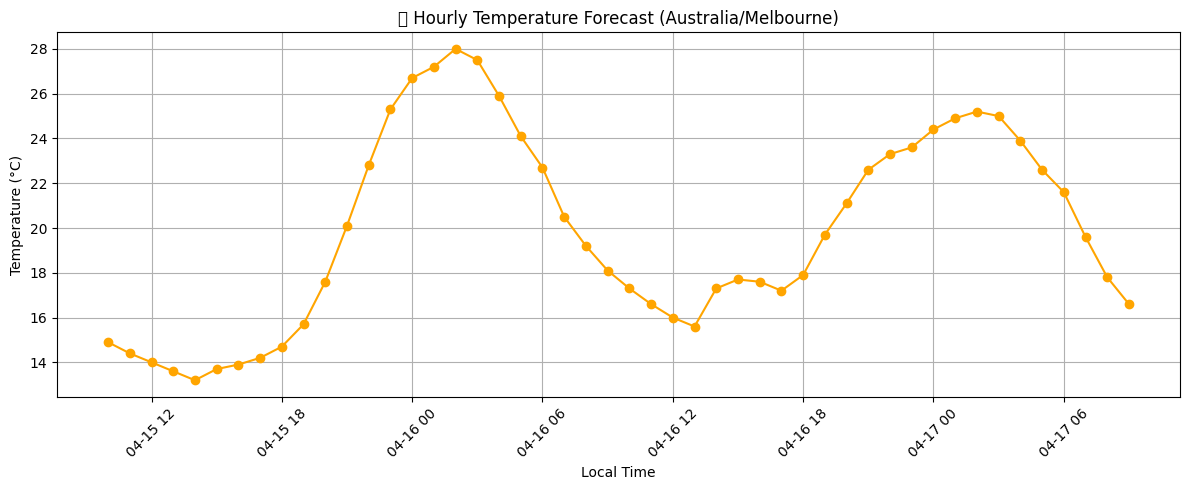

In [ ]:
# Convert to DataFrame
df = pd.DataFrame({
    "time_utc": pd.to_datetime(data["hourly"]["time"]),
    "temperature_2m": data["hourly"]["temperature_2m"]
})

# Convert UTC time to Australia/Melbourne
mel_tz = pytz.timezone("Australia/Melbourne")
df["time_local"] = df["time_utc"].dt.tz_localize("UTC").dt.tz_convert(mel_tz)

#  Plot temperature over time
plt.figure(figsize=(12, 5))
plt.plot(df["time_local"], df["temperature_2m"], marker="o", color="orange")
plt.title("🌡️ Hourly Temperature Forecast (Australia/Melbourne)")
plt.xlabel("Local Time")
plt.ylabel("Temperature (°C)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()